In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/co2-emission-by-countries-year-wise-17502022/CO2 emission by countries.csv


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('/kaggle/input/co2-emission-by-countries-year-wise-17502022/CO2 emission by countries.csv',
                encoding='latin1')
df.head()

,Country,Code,Calling Code,Year,CO2 emission (Tons),Population(2022),Area,% of World,Density(km2)
0,Afghanistan,AF,93,1750,0.0,41128771.0,652230.0,0.40%,63/km²
1,Afghanistan,AF,93,1751,0.0,41128771.0,652230.0,0.40%,63/km²
2,Afghanistan,AF,93,1752,0.0,41128771.0,652230.0,0.40%,63/km²
3,Afghanistan,AF,93,1753,0.0,41128771.0,652230.0,0.40%,63/km²
4,Afghanistan,AF,93,1754,0.0,41128771.0,652230.0,0.40%,63/km²


In [17]:
df.isnull().sum()

Country                   0
Code                   2168
Calling Code           3523
Year                      0
CO2 emission (Tons)       0
Population(2022)       6504
Area                   4336
% of World             4336
Density(km2)           6504
dtype: int64

In [18]:
df.shape

(59620, 9)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59620 entries, 0 to 59619
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              59620 non-null  object 
 1   Code                 57452 non-null  object 
 2   Calling Code         56097 non-null  object 
 3   Year                 59620 non-null  int64  
 4   CO2 emission (Tons)  59620 non-null  float64
 5   Population(2022)     53116 non-null  float64
 6   Area                 55284 non-null  float64
 7   % of World           55284 non-null  object 
 8   Density(km2)         53116 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 4.1+ MB


In [20]:
df['% of World'] = df['% of World'].str.replace('%', '').astype(float)
df['Density(km2)'] = pd.to_numeric(df['Density(km2)'], errors='coerce')

In [21]:
df['CO2_per_capita'] = df['CO2 emission (Tons)'] / df['Population(2022)']

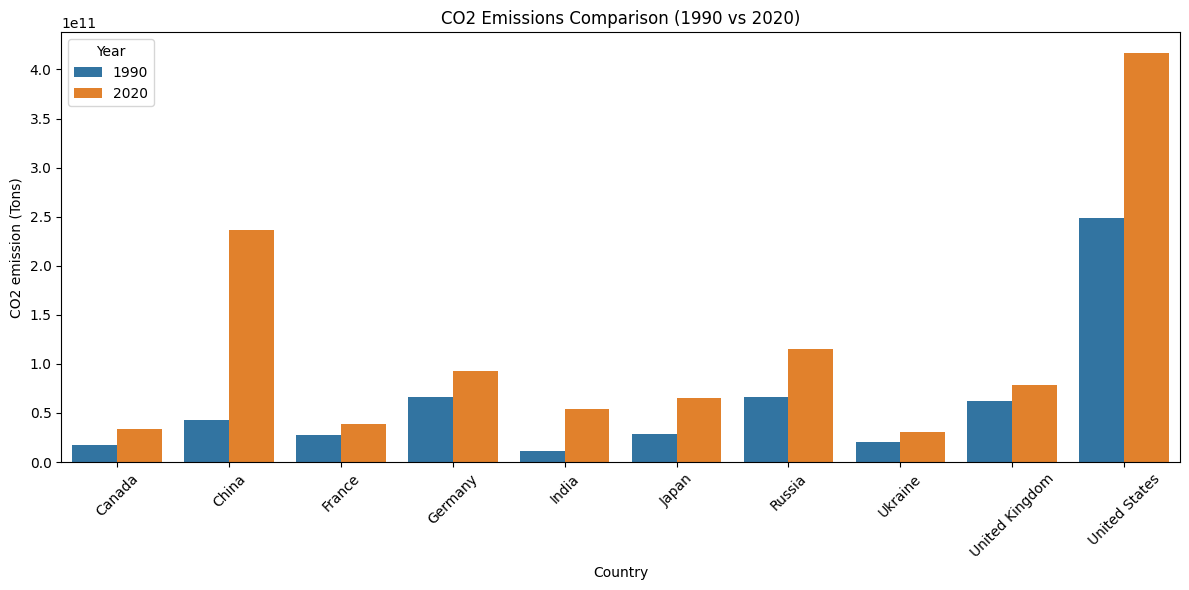

In [22]:
df_compare = df[df['Year'].isin([1990, 2020])]
top_emitters_2020 = df[df['Year'] == 2020].nlargest(10, 'CO2 emission (Tons)')['Country']

df_top = df_compare[df_compare['Country'].isin(top_emitters_2020)]

plt.figure(figsize=(12,6))
sns.barplot(data=df_top, x='Country', y='CO2 emission (Tons)', hue='Year')
plt.title('CO2 Emissions Comparison (1990 vs 2020)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


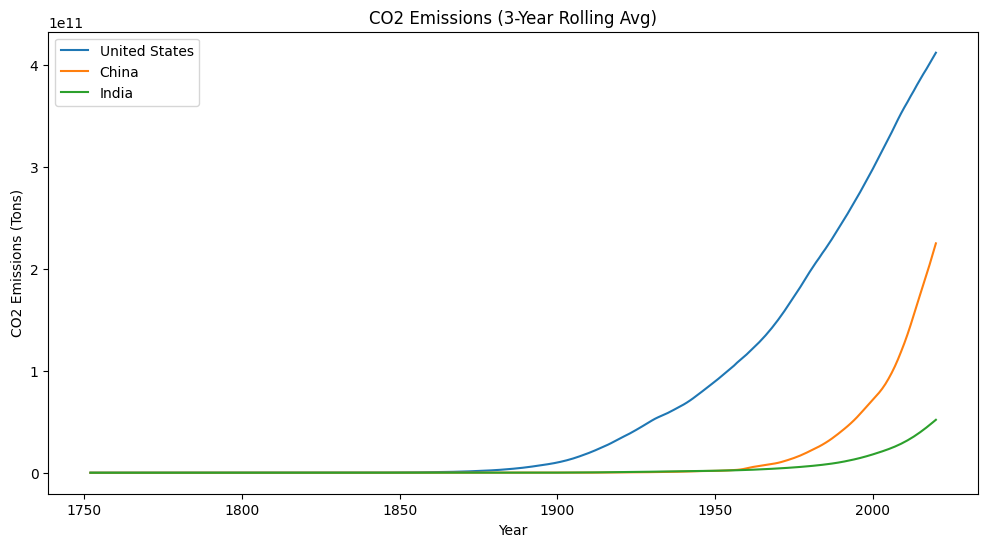

In [23]:

countries = ['United States', 'China', 'India']

plt.figure(figsize=(12,6))
for country in countries:
    data = df[df['Country'] == country].sort_values('Year')
    plt.plot(data['Year'], data['CO2 emission (Tons)'].rolling(3).mean(), label=country)

plt.title('CO2 Emissions (3-Year Rolling Avg)')
plt.ylabel('CO2 Emissions (Tons)')
plt.xlabel('Year')
plt.legend()
plt.show()


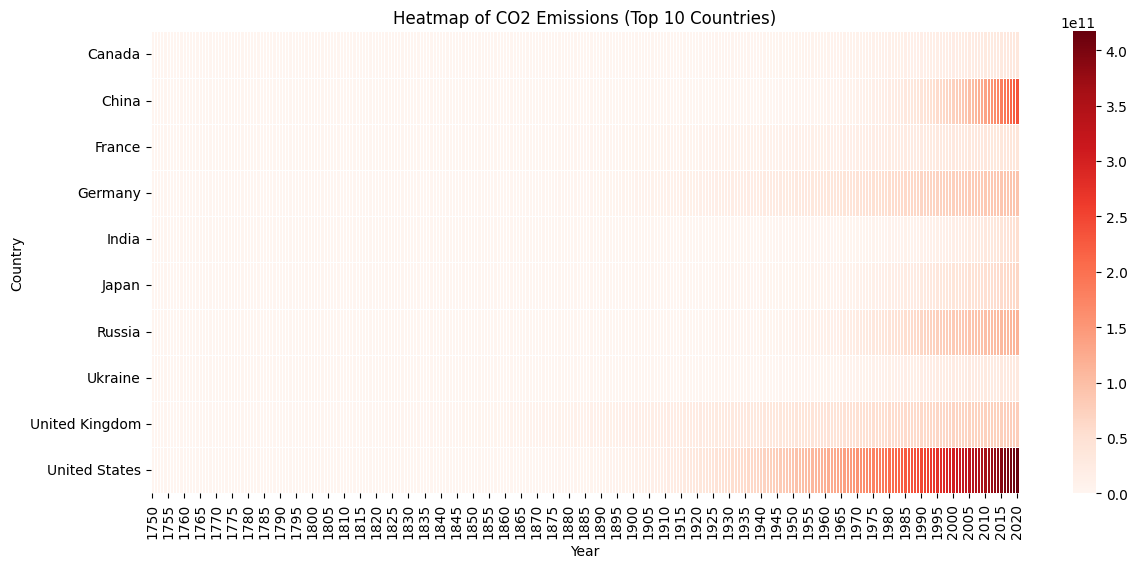

In [24]:
top10 = df[df['Year'] == 2020].nlargest(10, 'CO2 emission (Tons)')['Country']
df_heat = df[df['Country'].isin(top10)]

pivot = df_heat.pivot(index='Country', columns='Year', values='CO2 emission (Tons)')

plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap='Reds', linewidths=0.5)
plt.title('Heatmap of CO2 Emissions (Top 10 Countries)')
plt.show()


In [25]:
df_growth = df[df['Year'].isin([1990, 2020])]
df_pivot = df_growth.pivot(index='Country', columns='Year', values='CO2 emission (Tons)')
df_pivot['Growth (%)'] = ((df_pivot[2020] - df_pivot[1990]) / df_pivot[1990]) * 100
df_pivot = df_pivot.dropna()
df_pivot.sort_values('Growth (%)', ascending=False).head(10)


Year,1990,2020,Growth (%)
Country,,,
Marshall Islands,0.0,3416752.0,inf
Namibia,0.0,76039286.0,inf
Micronesia,0.0,3713305.0,inf
Wallis and Futuna,0.0,507247.0,inf
Timor,0.0,6543008.0,inf
Kosovo,0.0,105636749.0,inf
Eritrea,69051.0,17898960.0,2.582136e+04
Turks and Caicos Islands,29312.0,3930547.0,1.330934e+04
Mayotte,66014.0,6517460.0,9.772845e+03
